# 위기탈출 헬 조선 (Fall-Semester Data Base Project)

## 1. data Processing

### 1.1 load the libraries

In [1]:
#import the libraries For data analysis 
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [3]:
%matplotlib inline

import platform
path="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system')

### 1.2Load the dataset for using this project

In [4]:
#Load the data into variable
traffic_data = pd.read_csv('./data/traffic/traffic-accident-2012_2017.csv')
tax_data = pd.read_csv('./data/tax/tax_total.csv')
crime_2015_data = pd.read_csv('./data/crime/crime-city-2015_1.csv')
crime_2016_data = pd.read_csv('./data/crime/crime-city-2016_1.csv')
#population_data = pd.read_csv('./data/population/population.csv')


### 1.3 Create the data and Convert data

#### 1.3.1 Convert the Traffic accident data

In [5]:
#check the traffic dataset 
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27255 entries, 0 to 27254
Data columns (total 7 columns):
발생년       27255 non-null int64
발생년월일시    27255 non-null int64
주야        27255 non-null object
요일        27255 non-null object
사망자수      27255 non-null int64
사상자수      27255 non-null int64
발생지       27255 non-null object
dtypes: int64(4), object(3)
memory usage: 1.5+ MB


In [6]:
#Grouping of traffic_accident data in day using pandas 'isin'
search_year = ['2015']
traffic_2015 = traffic_data.loc[traffic_data['발생년'].isin(search_year),:].groupby("요일").size() #2015s traffic accident
search_year = ['2016']
traffic_2016 = traffic_data.loc[traffic_data['발생년'].isin(search_year),:].groupby("요일").size() #2016s traffic accident

In [7]:
#Using numpy transpose series to Array
A = np.asarray(traffic_2015)
Traffic_day_2015 = A.transpose()
A = np.asarray(traffic_2016)
Traffic_day_2016= A.transpose()

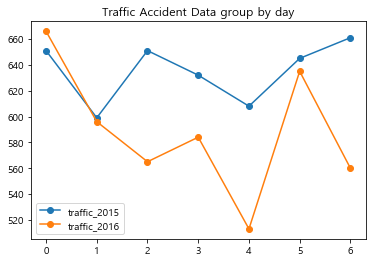

In [8]:
#visulation the traffic data
plt.plot(Traffic_day_2015, '-o', label= 'traffic_2015')
plt.title("Traffic Accident Data group by day")
plt.plot(Traffic_day_2016, '-o', label= 'traffic_2016')
plt.legend(loc='lower left')

#### 1.3.2  "4C"the Crime_city data

In [9]:
#Check the dataset of Crime data
crime_2015_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 57 columns):
범죄대분류     38 non-null object
범죄중분류     38 non-null object
계         38 non-null int64
서울        38 non-null int64
부산        38 non-null int64
대구        38 non-null int64
인천        38 non-null int64
광주        38 non-null int64
대전        38 non-null int64
울산        38 non-null int64
경기 부천     38 non-null int64
경기 수원     38 non-null int64
경기 성남     38 non-null int64
전북 전주     38 non-null int64
경기 안양     38 non-null int64
충북 청주     38 non-null int64
경남 창원     38 non-null int64
경기 광명     38 non-null int64
경북 포항     38 non-null int64
경기 안산     38 non-null int64
경남 진주     38 non-null int64
경기 고양     38 non-null int64
제주        38 non-null int64
전남 목포     38 non-null int64
경기 의정부    38 non-null int64
전북 익산     38 non-null int64
전북 군산     38 non-null int64
경북 구미     38 non-null int64
충남 천안     38 non-null int64
전남 여수     38 non-null int64
강원 춘천     38 non-null int64
강원 원주     38 non-null int64

In [10]:
#Check the "범죄대분류"
print(crime_2015_data["범죄대분류"])

0       강력범죄
1       강력범죄
2       강력범죄
3       강력범죄
4       강력범죄
5       강력범죄
6       강력범죄
7       강력범죄
8       절도범죄
9       폭력범죄
10      폭력범죄
11      폭력범죄
12      폭력범죄
13      폭력범죄
14      폭력범죄
15      폭력범죄
16      폭력범죄
17      지능범죄
18      지능범죄
19      지능범죄
20      지능범죄
21      지능범죄
22      지능범죄
23      지능범죄
24      지능범죄
25      지능범죄
26      풍속범죄
27      풍속범죄
28    특별경제범죄
29      마약범죄
30      보건범죄
31      환경범죄
32      교통범죄
33      노동범죄
34      안보범죄
35      선거범죄
36      병역범죄
37      기타범죄
Name: 범죄대분류, dtype: object


In [11]:
#Clean the "지능범죄 to 기타범죄"
crime_2015_data.drop(crime_2015_data.index[[range(17,38)]], inplace=True)
crime_2016_data.drop(crime_2016_data.index[[range(17,38)]], inplace=True)

#### 

In [12]:
#Load the convert data
total_data = pd.read_csv('./data/통합.csv', engine='python')

In [13]:
total_data['city'] = total_data['city_name'] +' ' +total_data['district_name']

In [14]:
total_data.set_index('city', inplace=True)
total_data.head()

,city_name,district_name,idx,year,city_idx,age,total,total_out,total_m,total_w,...,in_w,out_m,out_w,out_per,suicide_rate,crimeRate,범죄수,CCTV,교통사망자,tax
city,,,,,,,,,,,,,,,,,,,,,
서울특별시 서울,서울특별시,서울,2185,2016,1,합계,9805506,335167,4799115,5006391,...,4833965,162741,172426,0.0342,19.8,0.000199,1950,44457,342,9549733230
인천광역시 인천,인천광역시,인천,2263,2016,2,합계,2913024,71873,1465699,1447325,...,1417411,41959,29914,0.0247,23.2,0.000969,2824,8680,137,1853394506
제주특별자치도 제주,제주특별자치도,제주,4343,2016,3,합계,623332,17476,314133,309199,...,301917,10194,7282,0.0280,21.0,0.005594,3487,2249,77,651379778
세종특별자치시 세종,세종특별자치시,세종,2367,2016,4,합계,242507,4835,122648,119859,...,117907,2883,1952,0.0199,23.2,0.003629,880,1848,25,294869511
대전광역시 대전,대전광역시,대전,2315,2016,5,합계,1535445,19687,770971,764474,...,754009,9222,10465,0.0128,22.6,0.001199,1841,6356,94,577589143


In [16]:
#delete the non_valueable
del total_data['age']
del total_data['total_m']
del total_data['total_w']
del total_data['in_m']
del total_data['in_w']
del total_data['out_m']
del total_data['out_w']
total_data.head()

,city_name,district_name,idx,year,city_idx,total,total_out,out_per,suicide_rate,crimeRate,범죄수,CCTV,교통사망자,tax
city,,,,,,,,,,,,,,
서울특별시 서울,서울특별시,서울,2185,2016,1,9805506,335167,0.0342,19.8,0.000199,1950,44457,342,9549733230
인천광역시 인천,인천광역시,인천,2263,2016,2,2913024,71873,0.0247,23.2,0.000969,2824,8680,137,1853394506
제주특별자치도 제주,제주특별자치도,제주,4343,2016,3,623332,17476,0.0280,21.0,0.005594,3487,2249,77,651379778
세종특별자치시 세종,세종특별자치시,세종,2367,2016,4,242507,4835,0.0199,23.2,0.003629,880,1848,25,294869511
대전광역시 대전,대전광역시,대전,2315,2016,5,1535445,19687,0.0128,22.6,0.001199,1841,6356,94,577589143


### Check the Correlation Analysis

In [17]:
#Correlation Analysis using numpy corrcoef
# less than 0.1 ignored
# less than 0.3 a weak correlation
# less than 0.7 a strong correlation

#first with 'cctv' & 'crime amount'
np.corrcoef(total_data['CCTV'],total_data['범죄수'])

array([[1.        , 0.32780264],
       [0.32780264, 1.        ]])

In [18]:
#second with 'cctv' & 'traafic accident'
np.corrcoef(total_data['CCTV'], total_data['교통사망자'])

array([[1.        , 0.90622469],
       [0.90622469, 1.        ]])

In [19]:
#thrid with  'cctv' & 'foreigner rate'
np.corrcoef(total_data['CCTV'], total_data['out_per'])

array([[ 1.        , -0.00953766],
       [-0.00953766,  1.        ]])

In [20]:
np.corrcoef(total_data['total'], total_data['suicide_rate'])

array([[ 1.        , -0.17275661],
       [-0.17275661,  1.        ]])

In [21]:
np.corrcoef(total_data['total'], total_data['crimeRate'])

array([[ 1.        , -0.48023171],
       [-0.48023171,  1.        ]])

In [22]:
np.corrcoef(total_data['total'], total_data['범죄수'])

array([[1.        , 0.34066104],
       [0.34066104, 1.        ]])

In [23]:
np.corrcoef(total_data['out_per'], total_data['범죄수'])

array([[1.        , 0.18652718],
       [0.18652718, 1.        ]])

In [24]:
np.corrcoef(total_data['out_per'], total_data['crimeRate'])

array([[1.        , 0.05043242],
       [0.05043242, 1.        ]])

In [25]:
np.corrcoef(total_data['tax'], total_data['범죄수'])

array([[1.        , 0.27060188],
       [0.27060188, 1.        ]])

In [26]:
np.corrcoef(total_data['tax'], total_data['suicide_rate'])

array([[ 1.        , -0.15963276],
       [-0.15963276,  1.        ]])

### Data visualation

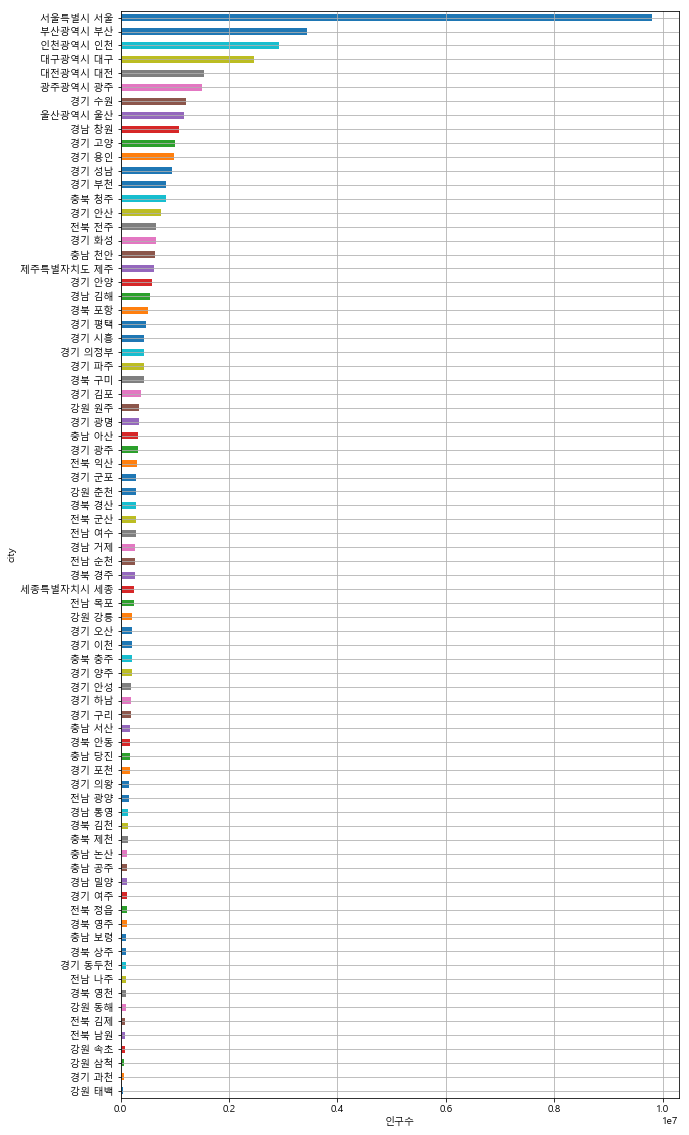

In [27]:
#Population Visualation
total_data['total'].sort_values().plot(kind='barh', grid=True, figsize=(10,20))
plt.xlabel('인구수')
plt.show()

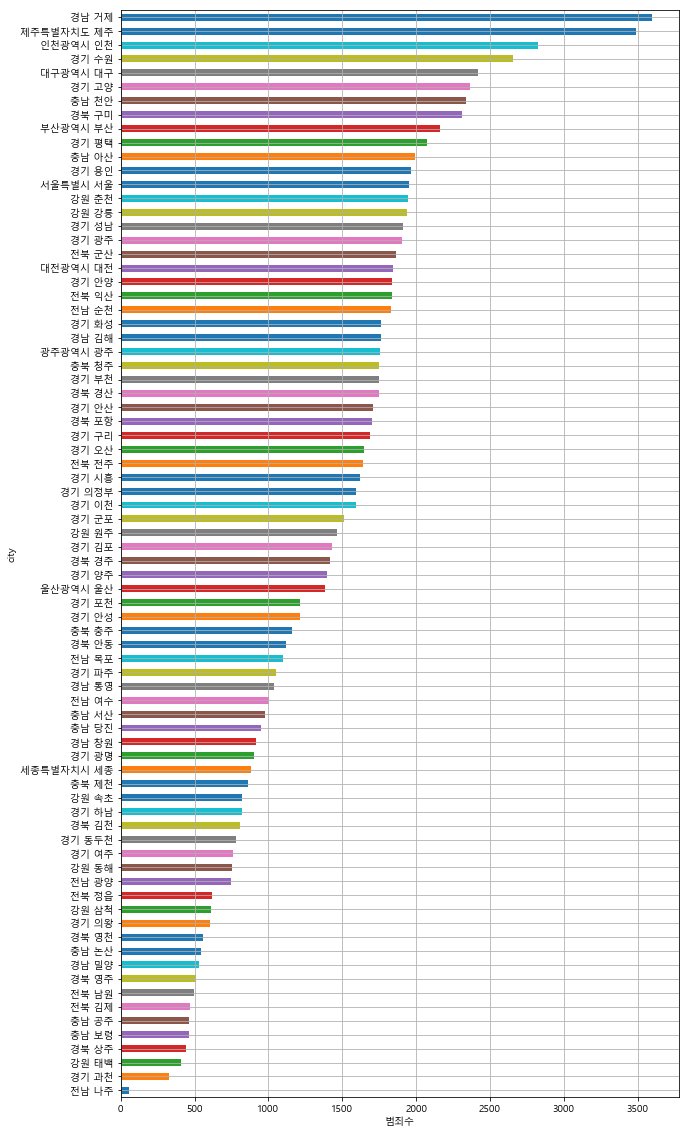

In [28]:
total_data['범죄수'].sort_values().plot(kind='barh', grid=True, figsize=(10,20))
plt.xlabel('범죄수')
plt.show()

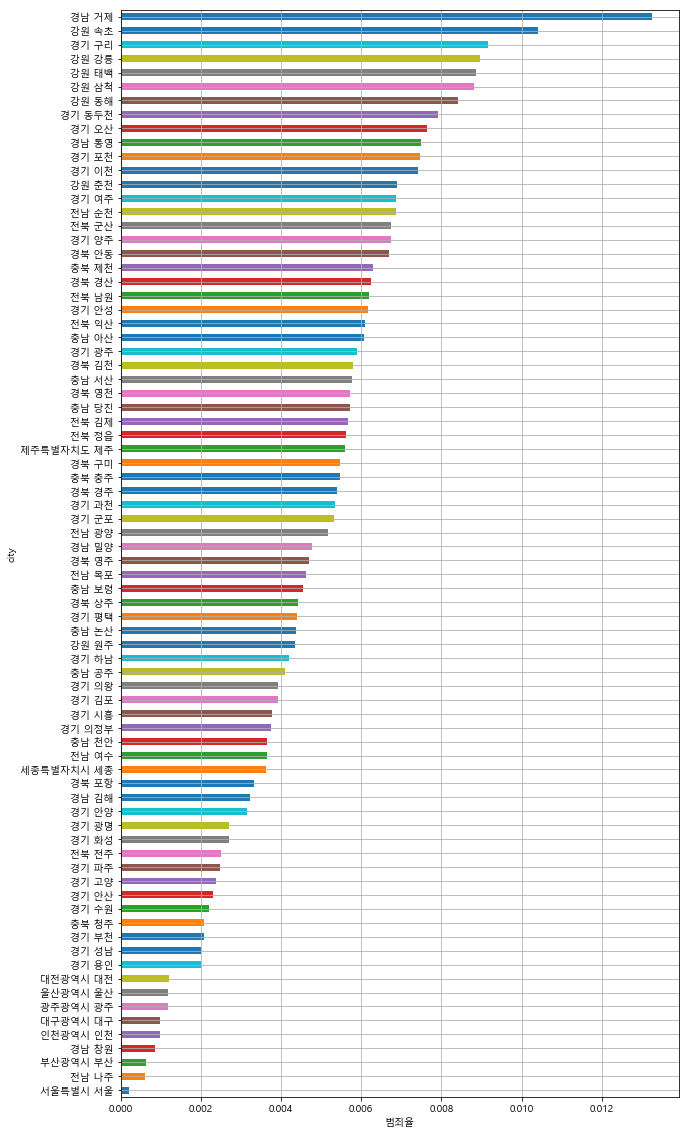

In [29]:
total_data['crimeRate'].sort_values().plot(kind='barh', grid=True, figsize=(10,20))
plt.xlabel('범죄율')
plt.show()

### Visualation correlation 

In [ ]:
sns.pairplot(total_data, vars=["total", "범죄수", "교통사망자"], kind='reg', size=3)
plt.show()

In [ ]:
sns.pairplot(total_data, vars=["CCTV", "suicide_rate", "범죄수"], kind='reg', size=3)
plt.show()

In [ ]:
tmp_max = total_data['crimeRate'].max()
total_data['crimeRate_sort'] = total_data['crimeRate'] /tmp_max*100
total_data_sort = total_data.sort_values(by = 'crimeRate_sort', ascending=False)
total_data_sort.head()

In [ ]:
target_col =['suicide_rate', 'crimeRate', '교통사망자']

plt.figure(figsize=(10,20))
sns.heatmap(total_data_sort[target_col], annot=True, fmt='f', linewidths=.5)
plt.show()

#### Import the Geographic Json

In [ ]:
#Load the json File
import json
geo_path = './data/geo/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
import folium
map = folium.Map(location=[37.5502,126.982], zoom_start=11, tiles='Stamen Toner')
map